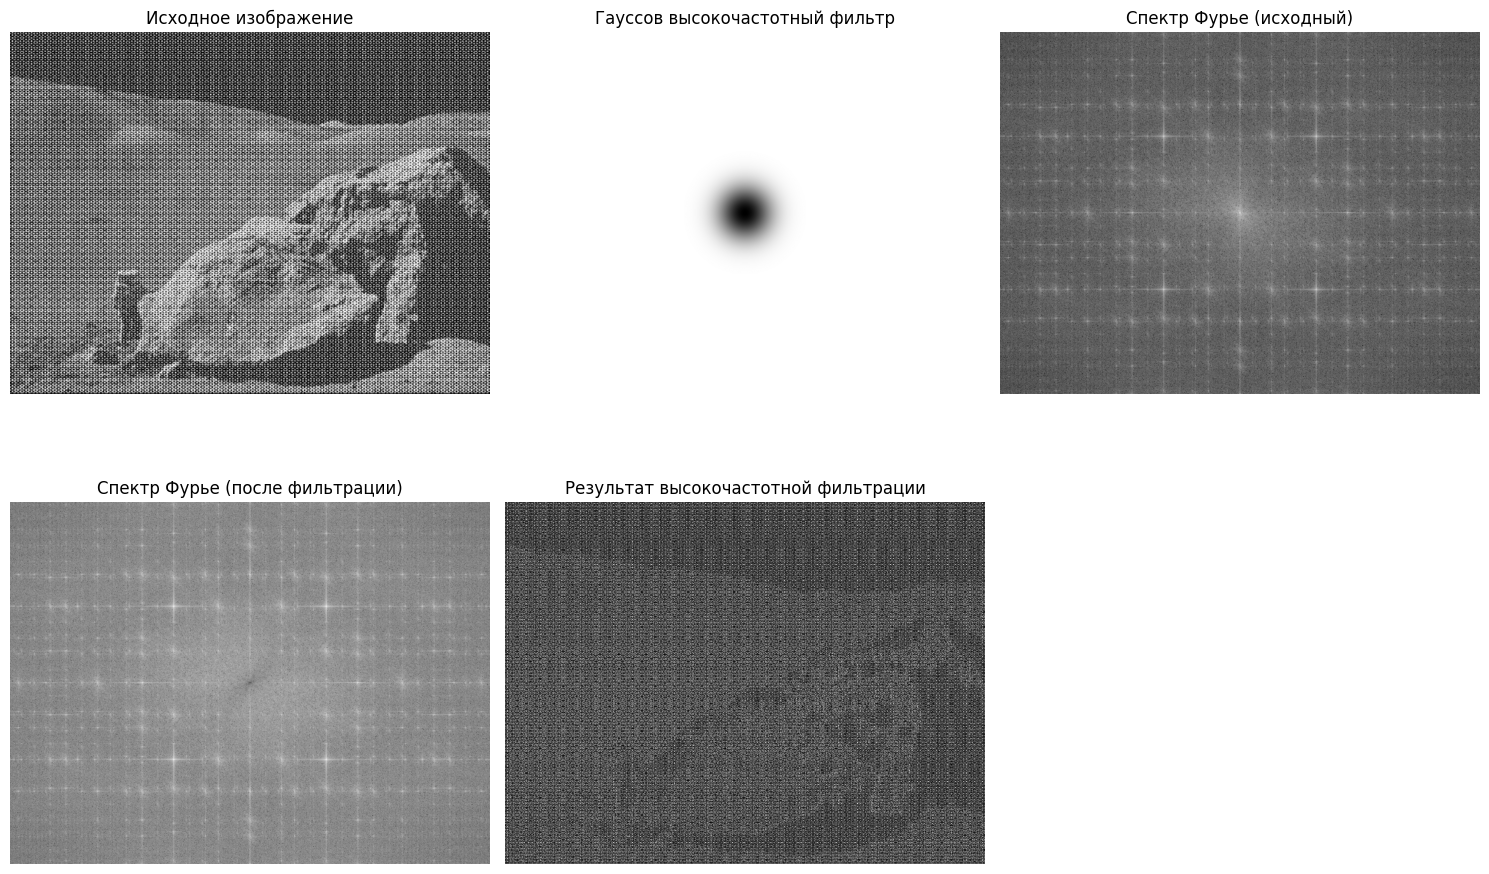

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('periodic_noise.jpg', cv2.IMREAD_GRAYSCALE)

def gaussian_highpass_filter(shape, sigma=30):
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2
    y, x = np.ogrid[-crow:rows-crow, -ccol:cols-ccol]
    gaussian_lowpass = np.exp(-(x**2 + y**2) / (2 * sigma**2))
    gaussian_highpass = 1 - gaussian_lowpass
    return gaussian_highpass

dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

ghpf = gaussian_highpass_filter(img.shape, sigma=30)

dft_shift_filtered = dft_shift * ghpf[:, :, np.newaxis]

f_ishift = np.fft.ifftshift(dft_shift_filtered)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])

plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Исходное изображение')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(ghpf, cmap='gray')
plt.title('Гауссов высокочастотный фильтр')
plt.axis('off')

magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]) + 1)
plt.subplot(2, 3, 3)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Спектр Фурье (исходный)')
plt.axis('off')

magnitude_spectrum_filtered = 20 * np.log(cv2.magnitude(dft_shift_filtered[:, :, 0], dft_shift_filtered[:, :, 1]) + 1)
plt.subplot(2, 3, 4)
plt.imshow(magnitude_spectrum_filtered, cmap='gray')
plt.title('Спектр Фурье (после фильтрации)')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(img_back, cmap='gray')
plt.title('Результат высокочастотной фильтрации')
plt.axis('off')

plt.tight_layout()
plt.show()

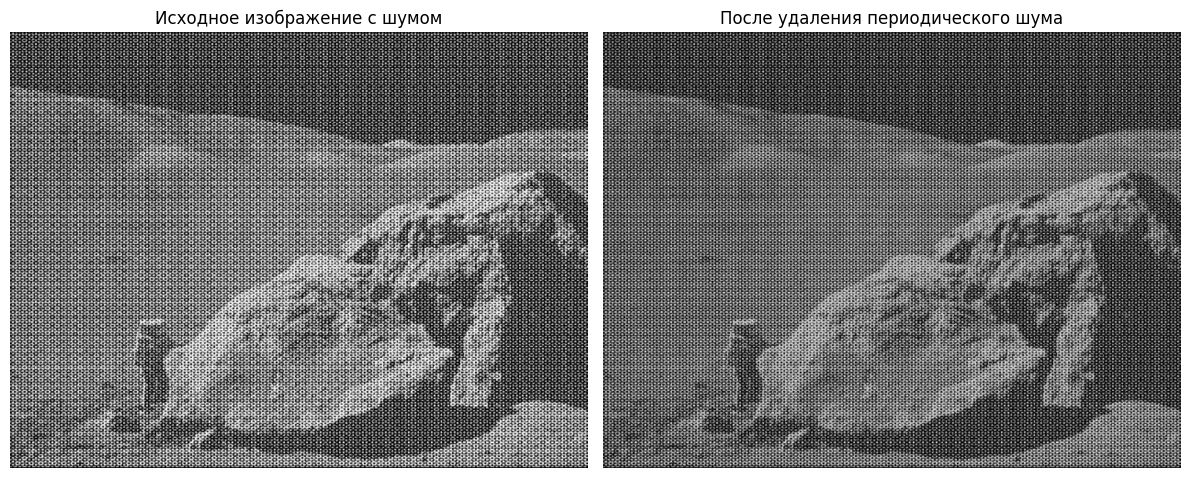

In [4]:
dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

rows, cols = img.shape
crow, ccol = rows // 2, cols // 2
mask = np.ones((rows, cols, 2), np.uint8)
noise_points = [
    (crow - 50, ccol - 50), (crow + 50, ccol + 50),
    (crow - 50, ccol + 50), (crow + 50, ccol - 50),
    (crow - 80, ccol), (crow + 80, ccol),
    (crow, ccol - 80), (crow, ccol + 80)
]
r = 15 
for point in noise_points:
    y, x = point
    cv2.circle(mask, (x, y), r, (0, 0, 0), -1)

dft_shift_filtered = dft_shift * mask

f_ishift = np.fft.ifftshift(dft_shift_filtered)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])

img_back = cv2.normalize(img_back, None, 0, 255, cv2.NORM_MINMAX)
img_back = np.uint8(img_back)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Исходное изображение с шумом')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_back, cmap='gray')
plt.title('После удаления периодического шума')
plt.axis('off')

plt.tight_layout()
plt.show()